In [2]:
from collections import defaultdict
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

import ihop
from ihop.community2vec import GensimCommunity2Vec
import ihop.clustering as ic

In [3]:

DATA_ROOT = Path("../data")
C2V_ROOT = DATA_ROOT / "community2vec"

MONTHS = sorted(["2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10", "2021-11", "2021-12", "2022-01", "2022-02", "2022-03"
])

In [28]:
metrics_list = []
for m in MONTHS:
    metrics_path = C2V_ROOT / f"RC_{m}"/"best_model" / "metrics.json"
    with open(metrics_path) as f:
        month_metrics = json.load(f)
    month_metrics["month"]=m
    month_metrics["total_analogies_available"]=int(month_metrics["detailed_analogy_results"].split(":")[-1].split("/")[1])

    comment_counts_df = pd.read_csv(C2V_ROOT / f"RC_{m}" / "subreddit_counts.csv", header=0)
    total_comments = comment_counts_df["count"].sum()
    month_metrics["total_comments"] = total_comments
    metrics_list.append(month_metrics)

metrics_df = pd.DataFrame.from_records(metrics_list)
display(metrics_df)
    


,model_id,contexts_path,analogy_accuracy,detailed_analogy_results,num_users,max_comments,epochs,vector_size,skip_gram,hierarchical_softmax,negative,ns_exponent,alpha,min_alpha,seed,batch_words,sample,month,total_analogies_available,total_comments
0,alpha0.05_negative10_sample0.001_vectorSize100,data/community2vec/RC_2021-04/user_contexts,0.619700,"major-league-baseball:285/406,national-basketb...",6088353,69,5,100,1,0,10,0.75,0.05,0.0001,1,10000,0.001,2021-04,3137,187436409
1,alpha0.05_negative10_sample0_vectorSize100,data/community2vec/RC_2021-05/user_contexts,0.644200,"major-league-baseball:277/406,national-basketb...",6230171,71,5,100,1,0,10,0.75,0.05,0.0001,1,10000,0.000,2021-05,2819,199293498
2,alpha0.08_negative10_sample0.001_vectorSize100,data/community2vec/RC_2021-06/user_contexts,0.654499,"major-league-baseball:282/406,national-basketb...",6069723,71,5,100,1,0,10,0.75,0.08,0.0001,1,10000,0.001,2021-06,2356,189911129
3,alpha0.05_negative20_sample0.005_vectorSize100,data/community2vec/RC_2021-07/user_contexts,0.629696,"major-league-baseball:288/406,national-basketb...",5988494,72,5,100,1,0,20,0.75,0.05,0.0001,1,10000,0.005,2021-07,2795,195426036
4,alpha0.05_negative20_sample0.005_vectorSize100,data/community2vec/RC_2021-08/user_contexts,0.643406,"major-league-baseball:279/378,national-basketb...",6209871,76,5,100,1,0,20,0.75,0.05,0.0001,1,10000,0.005,2021-08,3124,209480853
5,alpha0.05_negative20_sample0_vectorSize100,data/community2vec/RC_2021-09/user_contexts,0.636596,"major-league-baseball:209/325,national-basketb...",6165891,75,5,100,1,0,20,0.75,0.05,0.0001,1,10000,0.000,2021-09,2738,204142399
6,alpha0.05_negative10_sample0_vectorSize100,data/community2vec/RC_2021-10/user_contexts,0.659462,"major-league-baseball:163/253,national-basketb...",6354297,76,5,100,1,0,10,0.75,0.05,0.0001,1,10000,0.000,2021-10,2452,209575799
7,alpha0.05_negative10_sample0.001_vectorSize100,data/community2vec/RC_2021-11/user_contexts,0.629716,"major-league-baseball:153/231,national-basketb...",6458078,74,5,100,1,0,10,0.75,0.05,0.0001,1,10000,0.001,2021-11,2571,209540141
8,alpha0.05_negative10_sample0.001_vectorSize100,data/community2vec/RC_2021-12/user_contexts,0.644102,"major-league-baseball:76/105,national-basketba...",6632226,75,5,100,1,0,10,0.75,0.05,0.0001,1,10000,0.001,2021-12,2467,216496225
9,alpha0.05_negative10_sample0.005_vectorSize100,data/community2vec/RC_2022-01/user_contexts,0.624691,"major-league-baseball:36/45,national-basketbal...",6992556,79,5,100,1,0,10,0.75,0.05,0.0001,1,10000,0.005,2022-01,2835,234137900


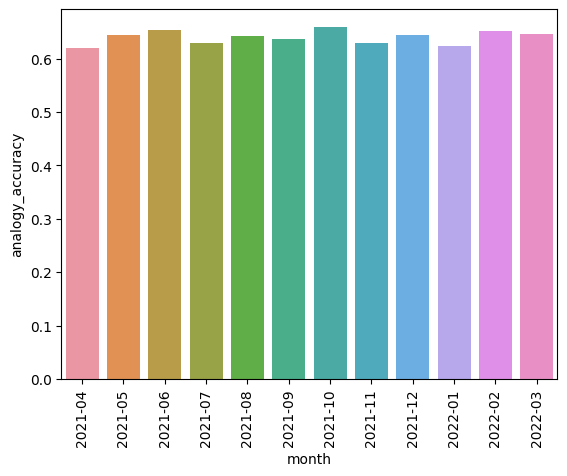

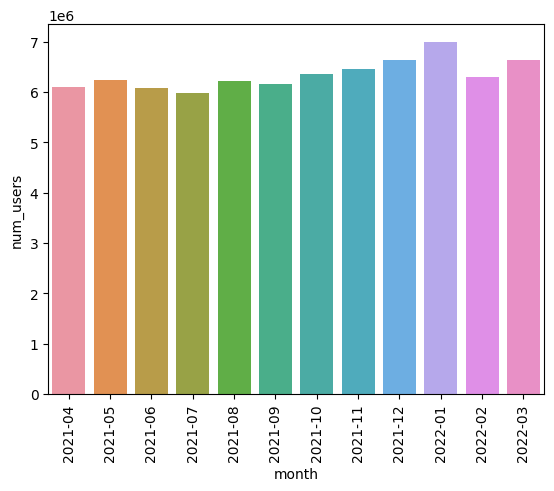

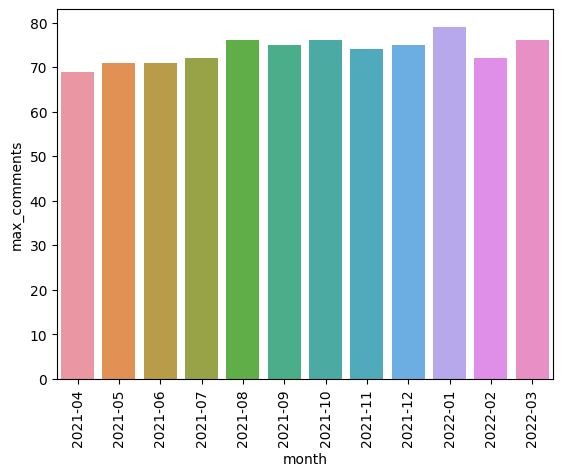

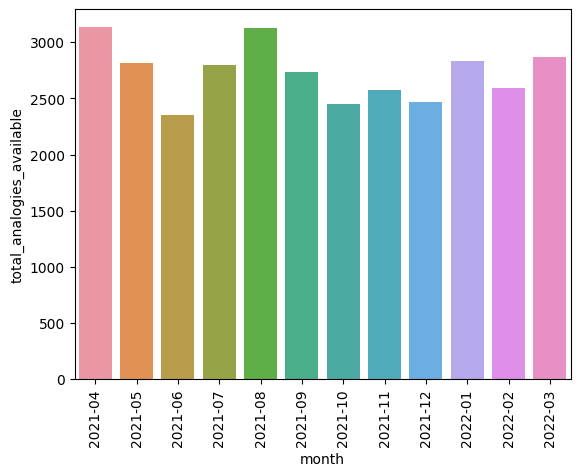

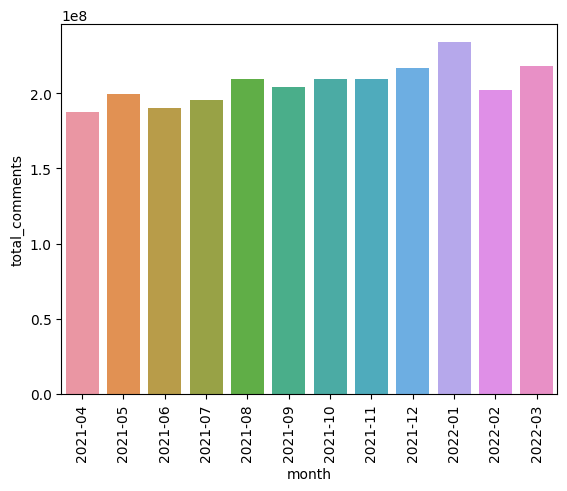

<Figure size 640x480 with 0 Axes>

In [29]:
for val_label in ["analogy_accuracy", "num_users", "max_comments", "total_analogies_available", "total_comments"]:
    sns.barplot(data=metrics_df, x="month", y=val_label)
    plt.xticks(rotation=90)
    plt.show()
    plt.clf()

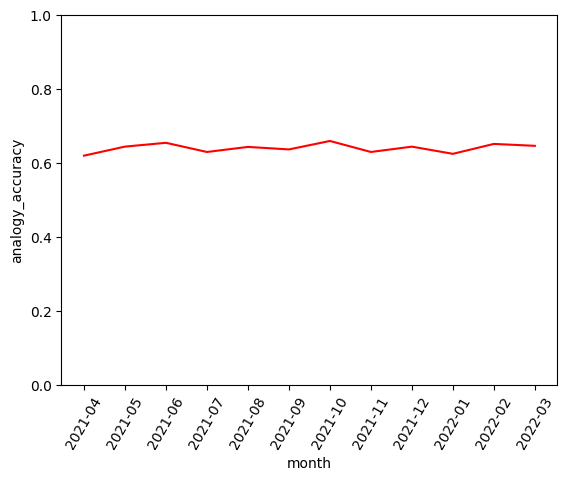

<Figure size 640x480 with 0 Axes>

In [25]:
ax = sns.lineplot(data=metrics_df, x="month", y="analogy_accuracy", color="red")
ax.set_ylim(0,1)
plt.xticks(rotation=60)
plt.show()
plt.clf()